# 1. Environment Setup and Dependencies

This section installs all the Python packages, system libraries, and pretrained model weights required to run SharpifyAI end-to-end.

In [36]:
!pip install numpy==1.23.5 --force-reinstall

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 6.31.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.15.0 which is incompatible.
jax 0.5.2 requires ml_dtypes>=0.4.0, but you have ml-dtypes 0.2.0 which is incompatible.
jax 0.5.2 requires numpy>=1.25

In [42]:
# SHARPIFY-AI: ENVIRONMENT SETUP
# -------------------------------------------------------------

# Core dependencies installation
!pip install torch==2.0.1 torchvision==0.15.2 --index-url https://download.pytorch.org/whl/cu118  # PyTorch with CUDA 11.8 support
!pip install tensorflow==2.15.0 numpy==1.23.5 --force-reinstall  # TensorFlow and a compatible NumPy version
!pip install matplotlib opencv-python Pillow scikit-image==0.19.3  # Plotting, image I/O, and scientific image processing
!pip install transformers==4.39.1 omegaconf gdown protobuf==3.20.*  # Transformers, configs, and download utilities

# Text enhancement setup → TextBSR + OCR
!apt-get update && apt-get install -y tesseract-ocr       # Tesseract OCR engine
!pip install pytesseract                                  # Python wrapper for Tesseract
!pip install textbsr                                      # TextBSR model

# Face enhancement setup→ GFPGAN
%cd /content
!git clone https://github.com/TencentARC/GFPGAN.git
%cd /content/GFPGAN
!pip install -r requirements.txt
!mkdir -p experiments/pretrained_models
!wget -nc -P experiments/pretrained_models https://github.com/TencentARC/GFPGAN/releases/download/v1.3.4/GFPGANv1.4.pth
!python setup.py develop

# Face segmentation setup → BiSeNet
%cd /content
!git clone https://github.com/zllrunning/face-parsing.PyTorch.git
!mkdir -p face-parsing.PyTorch/res/cp
!wget -O face-parsing.PyTorch/res/cp/79999_iter.pth \
    https://huggingface.co/ManyOtherFunctions/face-parse-bisent/resolve/main/79999_iter.pth

# Background enhancement setup → Real-ESRGAN
%cd /content
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
!pip install -r requirements.txt                          # Install ESRGAN dependencies
!pip install -e .                                         # Install Real-ESRGAN in editable mode
!mkdir -p weights
!wget -nc -P weights \
    https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.2.4/RealESRGAN_x4plus_anime_6B.pth

# Mount Google Drive for persistent I/O
from google.colab import drive
drive.mount('/content/drive')

# Create input/output folders on Drive
import os
base_path="/content/drive/MyDrive/SharpifyAI"
for d in ["inputs","outputs"]:
    os.makedirs(f"{base_path}/{d}", exist_ok=True)
print("Drive folders ready at:", base_path)

# Install extra image-quality tools
!pip install lpips               # Perceptual similarity
!pip install pytorch-msssim      # Multi-scale SSIM
!pip install colormath           # Color-difference (ΔE)
!pip install scipy               # Scientific computing

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached tensorflow-2.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached absl_py-2.3.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.7 kB)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached p

  Using cached protobuf-3.20.3-py2.py3-none-any.whl.metadata (720 bytes)
Using cached protobuf-3.20.3-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.8
    Uninstalling protobuf-4.25.8:
      Successfully uninstalled protobuf-4.25.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
onnx 1.18.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.15.0 which is incompatible.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.
bigframes 2.6.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
tensorflow-metadata 1.17.1 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
grpcio-stat

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Fetched 257 kB in 1s (235 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package list

/content
fatal: destination path 'GFPGAN' already exists and is not an empty directory.
/content/GFPGAN
File ‘experiments/pretrained_models/GFPGANv1.4.pth’ already there; not retrieving.

/usr/local/lib/python3.11/dist-packages/setuptools/__init__.py:92: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.

        By 2025-Oct-31, you need to update your project and remove deprecated calls
        or your builds will no longer be supported.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
/usr/local/lib/python3.11/dist-packages/setuptools/dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
!!

        ********************

# 2. Enhancement Pipeline Script

This cell creates the `enhance_pipeline.py` file, which implements the complete Sharpify-AI image enhancement pipeline.  
It sets up argument parsing, imports all required libraries, and defines functions for:  
- **Face segmentation** (BiSeNet)  
- **Face enhancement** (GFPGAN)  
- **Background super-resolution** (Real-ESRGAN)  
- **Text enhancement** (TextBSR)  
- **Quality evaluation** (PSNR, SSIM, LPIPS, ΔE₀₀, OCR confidence)  
- **Visualization utilities** (comparisons, histograms, heatmaps, metric plots)  


In [38]:
%%writefile /content/enhance_pipeline.py
"""
Image Enhancement Pipeline

This script performs image enhancement using:
  - Face segmentation with BiSeNet.
  - Face enhancement with GFPGAN.
  - Background enhancement with Real-ESRGAN.

It computes quality metrics (PSNR and SSIM) separately for:
  - The full image.
  - The segmented face region.
  - The background (complement of the face).

Additionally, it saves the segmentation mask, creates an overlay heatmap,
and plots a comparative metrics bar chart for analysis.
"""

# Standard library imports
import argparse
import sys
import os
import glob
import tempfile
import subprocess
import shutil
import json

# Scientific computing
import numpy as np
np.int = int
np.float = float

# Deep learning
import torch
import lpips
from pytorch_msssim import ms_ssim

# Image processing
import cv2
from PIL import Image, ImageDraw
from PIL import Image as PILImage
import pytesseract
from pytesseract import Output

# Image quality metrics
from skimage.exposure import match_histograms
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
from skimage.color import rgb2lab, deltaE_cie76
from skimage.filters import laplace

# Color difference
from colormath.color_objects import LabColor
from colormath.color_diff import delta_e_cie2000


# Super-resolution models
from realesrgan import RealESRGANer
from basicsr.archs.rrdbnet_arch import RRDBNet


# Text-based evaluation
from textbsr import textbsr

# Visualization
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

# Notebook display utilities
from IPython.display import display, Image as IPyImage

# Add BiSeNet path
sys.path.append("/content/face-parsing.PyTorch")


# =============================================================================
#       Utility / Stub Functions for Text
# =============================================================================


def ensure_dir(path: str) -> None:
    """
    Ensure the directory for the given file path exists.
    Creates parent directories if they don’t exist.
    """
    folder = os.path.dirname(path)
    if folder and not os.path.isdir(folder):
        os.makedirs(folder, exist_ok=True)


def get_text_mask(image_np: np.ndarray) -> np.ndarray:
    """
    Generate a binary mask (HxW) indicating text regions using Tesseract word bounding boxes.
    255 for text pixels, 0 otherwise.
    """
    data = pytesseract.image_to_data(image_np, output_type=Output.DICT)
    H, W = image_np.shape[:2]
    mask = np.zeros((H, W), dtype=np.uint8)
    n_boxes = len(data['level'])
    for i in range(n_boxes):
        conf_str = data['conf'][i]
        try:
            conf = int(conf_str)
        except:
            continue
        if conf > 50:  # threshold confidence
            x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
            x2, y2 = min(x + w, W), min(y + h, H)
            mask[y:y2, x:x2] = 255
    return mask


def ocr_confidence(image_np: np.ndarray) -> tuple:
    """
    Run Tesseract OCR on the entire image. Returns (avg_confidence, recognized_text).
    """
    data = pytesseract.image_to_data(image_np, output_type=Output.DICT)

    # Safely cast each entry in data['conf'] to int
    confs = []
    for c in data['conf']:
        try:
            val = int(c)
        except (ValueError, TypeError):
            continue
        if val >= 0:
            confs.append(val)

    texts = [t for t in data['text'] if t.strip() != ""]
    avg_conf = float(sum(confs) / len(confs)) if confs else 0.0
    full_text = " ".join(texts)
    return avg_conf, full_text


# =============================================================================
#       Helper Function: Laplacian Variance
# =============================================================================


def compute_laplacian_variance(img_np: np.ndarray) -> float:
    """
    Compute the variance of the Laplacian of the grayscale image,
    which is a simple measure of overall sharpness/clarity.
    """
    gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
    lap = cv2.Laplacian(gray, cv2.CV_64F)
    return float(lap.var())


def compute_face_alpha(lap_enh: float, lap_orig: float) -> float:
    """
    Compute the blending weight (α) for face enhancement based on the ratio of the enhanced
    Laplacian variance to the total variance.

    Formula:
        confidence = lap_enh / (lap_enh + lap_orig + ε)
        α = clip(confidence, 0.7, 0.95)

    Args:
        lap_enh: Laplacian variance of enhanced face region
        lap_orig: Laplacian variance of original face region

    Returns:
        float: Blending weight α between 0.7 and 0.95
    """
    confidence = lap_enh / (lap_enh + lap_orig + 1e-5)
    alpha = min(max(confidence, 0.7), 0.95)
    return alpha


def compute_background_alpha(lap_enh: float, lap_orig: float, base_alpha: float = 0.3) -> (float, float):
    """
    Compute the background blending weight (α) adaptively using the overall sharpness difference.

    Formula:
        sharp_diff = mean(|lap_enh - lap_orig|) / 255
        α = clip(base_alpha + sharp_diff, 0.3, 0.65)

    Args:
        lap_enh: Laplacian variance of enhanced background
        lap_orig: Laplacian variance of original background
        base_alpha: Minimum blending weight (default: 0.3)

    Returns:
        tuple: (alpha, sharp_diff) where alpha is the computed blending weight
               and sharp_diff is the normalized sharpness difference
    """
    sharp_diff = np.mean(np.abs(lap_enh - lap_orig)) / 255.0
    alpha = min(max(base_alpha + sharp_diff, 0.3), 0.65)
    print(f"DEBUG: Background alpha = {alpha:.3f} (sharpness diff = {sharp_diff:.4f})")
    return alpha, sharp_diff


# =============================================================================
#       Visualization Functions
# =============================================================================


def show_comparison(original_np: np.ndarray, enhanced_np: np.ndarray, save_path="outputs/compare.jpg") -> None:
    """Save and display the side-by-side comparison of original and enhanced images."""
    print("Before / After comparison:")
    # Ensure both images have the same height/width before stacking
    if original_np.shape[:2] != enhanced_np.shape[:2]:
        enhanced_resized = cv2.resize(
            enhanced_np,
            (original_np.shape[1], original_np.shape[0]),
            interpolation=cv2.INTER_LINEAR
        )
    else:
        enhanced_resized = enhanced_np
    comparison = np.hstack((original_np, enhanced_resized))
    ensure_dir(save_path)
    cv2.imwrite(save_path, cv2.cvtColor(comparison, cv2.COLOR_RGB2BGR))
    display(IPyImage(filename=save_path))


def show_histogram(original_np: np.ndarray, enhanced_np: np.ndarray, save_path="outputs/histogram.png") -> None:
    """
    Plot and save overlapping histograms of pixel intensities for the original vs. enhanced image.
    This gives a quick visual comparison of how the color distributions changed.
    """
    import matplotlib.pyplot as plt

    print("Histogram comparison (original vs. enhanced)...")
    # Compute per‐channel histograms (256 bins, range 0–255)
    channels = ['Red', 'Green', 'Blue']
    fig, ax = plt.subplots(figsize=(6, 4))

    for idx, color in enumerate(channels):
        orig_vals = original_np[..., idx].ravel()
        enh_vals  = enhanced_np[..., idx].ravel()

        # Plot original in a lighter shade, enhanced in a darker shade
        ax.hist(orig_vals, bins=256, range=(0, 255), color=color.lower(), alpha=0.3, label=f"Orig {color}")
        ax.hist(enh_vals,  bins=256, range=(0, 255), color=color.lower(), alpha=0.7, label=f"Enh {color}")

    ax.set_xlim(0, 255)
    ax.set_xlabel("Pixel intensity")
    ax.set_ylabel("Frequency")
    ax.set_title("Color Histogram: Original vs. Enhanced")
    ax.legend(loc="upper right")

    # Ensure the output directory exists
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()
    print(f"Saved histogram to {save_path}")


def plot_mean_intensity(original_np: np.ndarray, enhanced_np: np.ndarray, save_path="outputs/mean_intensity.png") -> None:
    """Plot a bar chart of the mean color intensity for each channel."""
    print("Mean intensity (AI metric visualization)...")
    orig_mean = np.mean(original_np, axis=(0, 1))
    enh_mean = np.mean(enhanced_np, axis=(0, 1))
    channels = ['Red', 'Green', 'Blue']
    x = np.arange(len(channels))
    width = 0.35
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(x - width/2, orig_mean, width, label="Original")
    ax.bar(x + width/2, enh_mean, width, label="Enhanced")
    ax.set_ylabel("Mean Intensity")
    ax.set_title("Mean Color Intensity by Channel")
    ax.set_xticks(x)
    ax.set_xticklabels(channels)
    ax.legend()
    ensure_dir(save_path)
    plt.savefig(save_path)
    plt.close()
    display(IPyImage(filename=save_path))


def plot_segmentation_heatmap(original_np: np.ndarray, face_mask: np.ndarray, save_path="outputs/segmentation_heatmap.png") -> None:
    """Overlay the face mask on the original image as a heatmap."""
    print("Plotting segmentation heatmap...")
    ensure_dir(save_path)
    plt.figure(figsize=(8, 6))
    plt.imshow(original_np)
    mask_norm = face_mask.astype(np.float32) / 255.0
    plt.imshow(mask_norm, cmap="jet", alpha=0.5)
    plt.title("Segmentation Heatmap of Face Regions")
    plt.axis("off")
    plt.savefig(save_path, bbox_inches="tight")
    plt.close()
    display(IPyImage(filename=save_path))


def plot_combined_metrics(metrics: dict, save_path="outputs/combined_metrics.png"):
    """
    Plot a grouped bar chart of normalized PSNR, SSIM, LPIPS_inv%, ΔE₀₀_inv% and MS-SSIM%
    for Full/Face/Background.
    """
    regions    = ["full", "face", "background"]
    labels     = ["Full", "Face", "Background"]
    raw_psnr   = [metrics[r].get("psnr", 0)    or 0 for r in regions]
    raw_ssim   = [metrics[r].get("ssim", 0)    or 0 for r in regions]
    raw_lpips  = [metrics[r].get("lpips", 0)   or 0 for r in regions]
    raw_de00   = [metrics[r].get("de00", 0)    or 0 for r in regions]
    raw_msssim = [metrics[r].get("msssim", 0.0) or 0.0 for r in regions]

    # convert to percentages
    psnr_pct   = [min(p/50*100, 100) for p in raw_psnr]
    ssim_pct   = [s*100        for s in raw_ssim]
    lpips_pct  = [(1 - l)*100  for l in raw_lpips]
    de00_pct   = [max(0, (10 - d)*10) for d in raw_de00]
    msssim_pct = [m*100        for m in raw_msssim]

    x = np.arange(len(labels))
    width = 0.15

    fig, ax = plt.subplots(figsize=(10,6))
    bars1 = ax.bar(x - 2*width, psnr_pct,   width, label="PSNR%")
    bars2 = ax.bar(x - width,   ssim_pct,   width, label="SSIM%")
    bars3 = ax.bar(x,           lpips_pct,  width, label="LPIPS_inv%")
    bars4 = ax.bar(x + width,   de00_pct,   width, label="ΔE₀₀_inv%")
    bars5 = ax.bar(x + 2*width, msssim_pct, width, label="MS-SSIM%")

    ax.set_ylabel("Normalized Quality (%)")
    ax.set_title("Combined Quality Metrics (Higher = Better)")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(0, 110)
    ax.legend()

    # annotate each bar
    for group in (bars1, bars2, bars3, bars4, bars5):
        for bar in group:
            h = bar.get_height()
            ax.annotate(f"{h:.1f}",
                        xy=(bar.get_x() + bar.get_width()/2, h),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha="center", va="bottom", fontsize=8)

    ensure_dir(save_path)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()


def plot_de00_histograms(delta_e00_map: np.ndarray, face_mask: np.ndarray,
                         save_path="outputs/de00_histograms.png"):
    """
    Plot histograms of ΔE₀₀ values in face vs background regions.
    If the map is all zeros (because ΔE calculation failed), it simply plots zeros.
    """
    face_vals = delta_e00_map[face_mask == 255].ravel()
    bg_vals   = delta_e00_map[face_mask == 0].ravel()

    plt.figure(figsize=(6,4))
    bins = np.linspace(0,10,50)
    plt.hist(bg_vals, bins=bins, color='blue', alpha=0.5, label='Background')
    plt.hist(face_vals, bins=bins, color='orange', alpha=0.5, label='Face')
    plt.xlim(0,10)
    plt.xlabel("ΔE$_{00}$")
    plt.ylabel("Frequency")
    plt.title("ΔE$_{00}$ Distribution: Face vs Background")
    plt.legend()
    ensure_dir(save_path)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()


def plot_ocr_confidence(orig_conf: float, enh_conf: float, save_path="outputs/ocr_confidence.png"):
    """
    Plot a bar chart comparing average OCR confidence: original vs enhanced.
    """
    labels = ["Orig OCR Conf.", "Enh OCR Conf."]
    values = [orig_conf, enh_conf]
    plt.figure(figsize=(6,4))
    bars = plt.bar(labels, values, color=['blue','green'])
    plt.ylabel("Avg. OCR Confidence (%)")
    plt.title("OCR Confidence: Original vs Enhanced")
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f}", ha="center")
    ensure_dir(save_path)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()


def plot_msssim_by_region(extended_metrics: dict, save_path="outputs/msssim_by_region.png"):
    """
    Plot MS-SSIM for Full, Face, and Background.
    """
    regions = ["full", "face", "background"]
    values = [
        extended_metrics["full"].get("msssim", 0.0) or 0.0,
        extended_metrics["face"].get("msssim", 0.0) or 0.0,
        extended_metrics["background"].get("msssim", 0.0) or 0.0
    ]
    labels = ["Full", "Face", "Background"]
    plt.figure(figsize=(6,4))
    bars = plt.bar(labels, values, color=['red','blue','green'])
    plt.ylabel("MS-SSIM")
    plt.title("MS-SSIM by Region")
    plt.ylim(0, 1.0)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.3f}", ha="center")
    ensure_dir(save_path)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()


# =============================================================================
#       Core Enhancement Functions
# =============================================================================


def get_face_mask(img_pil: Image.Image, device: str) -> np.ndarray:
    """
    Perform face segmentation using BiSeNet and return a binary face mask.

    Pipeline:
    1. Load pre-trained BiSeNet model (19-class face parser)
    2. Preprocess image (resize, normalize, convert to tensor)
    3. Run inference to get face part segmentation
    4. Convert segmentation to binary mask (face vs non-face)

    Args:
        img_pil: Input PIL Image in RGB format
        device: Torch device ('cuda' or 'cpu') for model inference

    Returns:
        np.ndarray: Binary mask (H,W) where 255=face pixels, 0=background

    Note: Uses these face part labels from CelebAMask-HQ:
          1:Skin, 2:Nose, 3:Eyebrows, 4:Eyes, 5:Ears, 6:Mouth, 10-16:Face outline
    """
    from model import BiSeNet

    # --- Model Loading ---
    print("Running face segmentation (BiSeNet)...")
    model_path = "/content/face-parsing.PyTorch/res/cp/79999_iter.pth"
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Model file not found at {model_path}")

    try:
        # Initialize the BiSeNet model with 19 classes as expected for face parsing
        net = BiSeNet(n_classes=19)
        # Load pre-trained weights and move model to selected device (CPU or GPU)
        net.load_state_dict(torch.load(model_path, map_location=device))
        net.eval().to(device)
    except Exception as e:
        raise RuntimeError(f"Failed to load BiSeNet model: {e}")

    # --- Image Preprocessing ---
    try:
        # Resize the image to 1024x1024 – BiSeNet expects fixed-size input
        img_resized = img_pil.resize((1024, 1024))
        # Convert image to numpy array and normalize pixel values to [-1, 1]
        np_img = np.array(img_resized).astype(np.float32) / 255.0
        np_img = (np_img - 0.5) / 0.5
        # Rearrange dimensions to match PyTorch format (channels first)
        np_img = np.transpose(np_img, (2, 0, 1))  # HWC → CHW
        # Convert to tensor, add batch dimension, and move to device
        tensor = torch.tensor(np_img, dtype=torch.float32).unsqueeze(0).to(device)
    except Exception as e:
        raise RuntimeError(f"Failed to preprocess image for segmentation: {e}")

    # --- Inference ---
    try:
        with torch.no_grad():  # No gradient needed during inference
            out = net(tensor)[0]  # Perform a forward pass through the model
            # Extract the most likely class at each pixel
            parsing = out.squeeze(0).cpu().numpy().argmax(0)
    except Exception as e:
        raise RuntimeError(f"Face segmentation failed: {e}")

    # --- Mask Generation ---
    # Define which labels represent face components in the segmentation map
    face_labels = [1, 2, 3, 4, 5, 6, 10, 11, 12, 13, 14, 15, 16]
    # Generate a binary mask: 255 for face regions, 0 for everything else
    face_mask = np.isin(parsing, face_labels).astype(np.uint8) * 255
    # Resize the binary mask back to match the original image dimensions
    face_mask = cv2.resize(face_mask, img_pil.size, interpolation=cv2.INTER_NEAREST)

    return face_mask


def save_segmentation_mask(face_mask: np.ndarray, save_path="outputs/segmentation_mask.png") -> None:
    """
    Save the binary face mask to disk as a PNG image.

    Args:
        face_mask: Binary numpy array mask (255 for face, 0 for background)
        save_path: File path to save the image
    """
    print("Saving segmentation mask...")
    ensure_dir(save_path)  # Create directory if it doesn't exist
    cv2.imwrite(save_path, face_mask)


def enhance_face(original_np: np.ndarray, face_mask: np.ndarray, device: str) -> np.ndarray:
    """
    Enhance face regions in an image using GFPGAN and blend them with the original image.
    The enhancement is constrained to regions defined by the binary face segmentation mask.

    Args:
        original_np (np.ndarray): The original RGB image (H x W x 3), dtype=uint8.
        face_mask (np.ndarray): A binary mask (same H x W) where face regions are marked as 255.
        device (str): Device identifier ("cuda" or "cpu") for GFPGAN inference.

    Returns:
        np.ndarray: The RGB image with enhanced face regions merged back in.
    """
    import os
    import cv2
    sys.path.append("/content/GFPGAN")
    from gfpgan import GFPGANer
    from skimage.exposure import match_histograms

    print("Enhancing face(s) using GFPGAN...")

    # --- Load the pretrained GFPGAN model ---
    model_path = "/content/GFPGAN/experiments/pretrained_models/GFPGANv1.4.pth"
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"GFPGAN model not found at {model_path}")

    try:
        gfpganer = GFPGANer(
            model_path=model_path,
            upscale=1,              # Keep original resolution
            arch="clean",           # Clean GFPGAN architecture
            channel_multiplier=2,   # Control network width
            bg_upsampler=None,      # Background enhancement is skipped
            device=device           # "cuda" or "cpu"
        )
    except Exception as e:
        raise RuntimeError(f"Failed to initialize GFPGANer: {e}")

    # Make a copy of the original image to write enhancements on
    result = original_np.copy()
    num_faces = 0  # Counter to report how many face regions were enhanced

    # --- Step 1: Detect contours in the binary face mask ---
    contours, _ = cv2.findContours(face_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # --- Step 2: Filter out small contours (likely noise) ---
    min_area = 500  # Minimum face region size to be considered valid
    filtered = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

    if len(filtered) == 0:
        print("[Warning] No valid face regions detected.")
        return result

    # --- Step 3: Compute bounding boxes around filtered face contours ---

    # For each contour (connected face region), compute the smallest upright rectangle
    # that fully contains it. Each bounding box is represented as (x, y, w, h).
    boxes = [cv2.boundingRect(cnt) for cnt in filtered]

    # --- Step 4: Merge overlapping bounding boxes using Intersection over Union (IoU) ---

    # Define a helper function to compute IoU between two bounding boxes.
    # IoU = area of overlap / area of union between two rectangles.
    def iou(box1, box2) -> float:
        x1, y1, w1, h1 = box1
        x2, y2, w2, h2 = box2

        # Calculate coordinates of the intersection rectangle
        xi1 = max(x1, x2)              # Left
        yi1 = max(y1, y2)              # Top
        xi2 = min(x1 + w1, x2 + w2)    # Right
        yi2 = min(y1 + h1, y2 + h2)    # Bottom

        # Calculate intersection area (set to 0 if no overlap)
        inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)

        # Compute union area: sum of areas of both boxes - overlap
        union_area = w1 * h1 + w2 * h2 - inter_area

        # Return IoU value (0 if union is zero to avoid division by zero)
        return inter_area / union_area if union_area != 0 else 0

    # List to hold final merged bounding boxes
    merged_boxes = []

    # Track which boxes have already been merged to avoid duplicate processing
    used = [False] * len(boxes)

    # Iterate through all boxes to check for overlaps
    for i in range(len(boxes)):
        if used[i]:
            continue  # Skip if already merged

        # Start with current box as the base
        x, y, w, h = boxes[i]

        # Check for overlaps with remaining boxes
        for j in range(i + 1, len(boxes)):
            if used[j]:
                continue  # Skip if already merged

            # If IoU between box i and box j > 0.3, consider them overlapping
            if iou(boxes[i], boxes[j]) > 0.3:
                x2, y2, w2, h2 = boxes[j]

                # Compute the bounding rectangle that encompasses both boxes
                x1 = min(x, x2)
                y1 = min(y, y2)
                x2b = max(x + w, x2 + w2)
                y2b = max(y + h, y2 + h2)

                # Update current box dimensions to the merged box
                x, y, w, h = x1, y1, x2b - x1, y2b - y1

                # Mark box j as used
                used[j] = True

        # Add the merged box to final list and mark it as used
        merged_boxes.append((x, y, w, h))
        used[i] = True

    # --- Step 5: Enhance each merged face region with GFPGAN and blend it back ---

    for idx, (x, y, w, h) in enumerate(merged_boxes):
        padding = 40  # Add context padding around the face box to improve enhancement

        # Calculate coordinates of the padded box, ensuring bounds stay within image
        x_min = max(x - padding, 0)
        y_min = max(y - padding, 0)
        x_max = min(x + w + padding, original_np.shape[1])  # Right boundary
        y_max = min(y + h + padding, original_np.shape[0])  # Bottom boundary

        # Extract the face region crop from the original image (RGB)
        face_crop = original_np[y_min:y_max, x_min:x_max]

        # Skip this box if the crop is empty (e.g., bad coordinates)
        if face_crop.size == 0:
            continue

        # Save raw face crop for debugging
        ensure_dir(f"debug/face_crop_{idx}.png")
        cv2.imwrite(f"debug/face_crop_{idx}.png", cv2.cvtColor(face_crop, cv2.COLOR_RGB2BGR))

        try:
            # Convert from RGB to BGR for GFPGAN input
            face_crop_bgr = cv2.cvtColor(face_crop, cv2.COLOR_RGB2BGR)

            # Run face enhancement using GFPGAN
            _, _, enhanced_crop_bgr = gfpganer.enhance(
                face_crop_bgr,
                has_aligned=False,
                only_center_face=False
            )

            # Convert back to RGB after enhancement
            enhanced_rgb = cv2.cvtColor(enhanced_crop_bgr, cv2.COLOR_BGR2RGB)

            # Save GFPGAN raw output
            ensure_dir(f"debug/enhanced_raw_{idx}.png")
            cv2.imwrite(f"debug/enhanced_raw_{idx}.png", cv2.cvtColor(enhanced_rgb, cv2.COLOR_RGB2BGR))

            # --- Histogram Matching ---
            # Adjust color distribution to match the original crop
            color_matched = match_histograms(enhanced_rgb, face_crop, channel_axis=-1)

            # --- Compute sharpness via Laplacian variance ---
            lap_enh = compute_laplacian_variance(enhanced_rgb)
            lap_orig = compute_laplacian_variance(face_crop)

            # Use sharpness ratio to define blending alpha
            alpha_val = compute_face_alpha(lap_enh, lap_orig)

            # --- Blend original and enhanced crop based on clarity ---
            harmonized = cv2.addWeighted(
                color_matched.astype(np.uint8), alpha_val,
                face_crop.astype(np.uint8), 1 - alpha_val,
                0
            )

            # Save final blended result
            ensure_dir(f"debug/harmonized_{idx}.png")
            cv2.imwrite(f"debug/harmonized_{idx}.png", cv2.cvtColor(harmonized, cv2.COLOR_RGB2BGR))

            # Paste the enhanced face region back into the result image
            result[y_min:y_max, x_min:x_max] = harmonized
            num_faces += 1

        except Exception as e:
            print(f"[Error] GFPGAN failed on face #{idx+1}: {e}")
            continue

    print(f"Enhanced face(s).")
    return result


def enhance_background(
    original_np:    np.ndarray,  # RGB input image (H × W × 3, uint8)
    face_mask:      np.ndarray,  # binary mask (H × W, 0/255) for faces
    device:         str,         # "cuda" or "cpu"
    upscale_factor: int = 4,     # target scaling; 4× supported by anime-6B
    tile_size:      int = 400,   # tile dimension for Real-ESRGAN
    zoom_coords:    tuple = (100, 100, 128, 128)
) -> np.ndarray:
    """
    Perform background-only super-resolution with Real-ESRGAN anime-6B, then
    re-insert the original faces and lightly harmonise colour and saturation.

    Steps
    -----
    1. Build RRDBNet backbone that matches the anime-6B checkpoint
    2. Mask out the faces so only background pixels are sent to the upsampler
    3. Run tiled Real-ESRGAN inference to obtain a high-resolution background
    4. Histogram-match the enhanced background to the original background
       in order to keep the global palette consistent
    5. Optionally reduce saturation
    6. Composite the upscaled background with the untouched faces
    7. Save the final composite for inspection
    """

    # ---------------- model & masks -------------------------------
    print(f"Background | Real-ESRGAN anime-6B @ x{upscale_factor}")

    # locate the script directory so we can find the downloaded weights
    script_dir = os.path.dirname(os.path.abspath(__file__))
    model_path = os.path.join(
        script_dir,
        "Real-ESRGAN",
        "weights",
        "RealESRGAN_x4plus_anime_6B.pth"
    )
    if not os.path.isfile(model_path):
        raise FileNotFoundError(
            f"Real-ESRGAN model not found at {model_path}.\n"
            "Did you download it into Real-ESRGAN/weights?"
        )


    # Network architecture parameters for anime-6B
    model = RRDBNet(
        num_in_ch   = 3,     # RGB input
        num_out_ch  = 3,     # RGB output
        num_feat    = 64,    # base feature maps
        num_block   = 6,     # number of RRDB blocks
        num_grow_ch = 32,    # growth channels inside each RRDB
        scale       = upscale_factor
    )

    # Real-ESRGAN inference wrapper
    upsampler = RealESRGANer(
        scale      = upscale_factor,
        model_path = model_path,
        model      = model,
        tile       = tile_size,   # tile for memory-safe processing
        tile_pad   = 10,          # overlap between tiles to hide seams
        pre_pad    = 0,           # no extra padding
        half       = False,       # use FP32 to avoid precision issues
        device     = device
    )

    # masks
    bg_mask       = cv2.bitwise_not(face_mask)
    mask_3ch      = np.repeat(bg_mask[:, :, None], 3, axis=2)
    face_mask_3ch = np.repeat(face_mask[:, :, None], 3, axis=2)

    # ---------------- isolate background --------------------------
    input_bgr       = cv2.cvtColor(original_np, cv2.COLOR_RGB2BGR)
    background_bgr  = cv2.bitwise_and(input_bgr, mask_3ch)

    # ---------------- upscale with Real-ESRGAN --------------------
    try:
        bg_enh_bgr, _ = upsampler.enhance(background_bgr, outscale=upscale_factor)
    except RuntimeError as e:
        print(f"Real-ESRGAN error: {e} – using original background.")
        return original_np.copy()

    bg_enh_rgb = cv2.cvtColor(bg_enh_bgr, cv2.COLOR_BGR2RGB)

    # ---------------- match colours back --------------------------
    # crop the ORIGINAL background (same spatial region as the enhanced version)
    orig_bg_rgb = cv2.cvtColor(background_bgr, cv2.COLOR_BGR2RGB)
    bg_enh_rgb  = match_histograms(bg_enh_rgb, orig_bg_rgb, channel_axis=-1).astype(np.uint8)

    # ---------------- optional: mild global saturation clamp ------
    hsv = cv2.cvtColor(bg_enh_rgb, cv2.COLOR_RGB2HSV).astype(np.float32)
    hsv[..., 1] *= 0.85                 # 85 % saturation
    hsv[..., 1]  = np.clip(hsv[...,1], 0, 255)
    bg_enh_rgb   = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)

    # ---------------- debug crop comparison -----------------------
    x, y, w, h = zoom_coords
    os.makedirs("outputs", exist_ok=True)

    # ---------------- composite face back -------------------------
    # resize background & masks to the same size
    H_in, W_in       = original_np.shape[:2]
    bg_enh_rgb_resz  = cv2.resize(bg_enh_rgb, (W_in, H_in), interpolation=cv2.INTER_CUBIC)
    mask_3ch_resz    = cv2.resize(mask_3ch, (W_in, H_in), interpolation=cv2.INTER_NEAREST)
    face_only        = cv2.bitwise_and(original_np, face_mask_3ch)

    # keep 60 % of the colour-matched background + 40 % of original
    harmonised_bg = cv2.addWeighted(
        bg_enh_rgb_resz, 0.60, cv2.bitwise_and(original_np, mask_3ch_resz), 0.40, 0
    )

    # final composite
    final = cv2.add(harmonised_bg, face_only)

    cv2.imwrite("outputs/debug_final_result.png", final)
    print("Background enhanced -> outputs/debug_final_result.png")
    return final


def enhance_text_bsr(image_np: np.ndarray) -> np.ndarray:
    """
    Enhance text regions across the entire image using the TextBSR pipeline (BSRGAN).
    This function bypasses any cropping or mask generation and applies BSRGAN to the
    full-resolution image, then returns the enhanced result at the original dimensions.

    Steps:
      1. Store the original image dimensions (height and width).
      2. Create temporary directories for input and output of TextBSR.
      3. Save the input NumPy array as a PNG file for BSRGAN processing.
      4. Invoke textbsr.bsr() to run BSRGAN on the entire image.
      5. Locate the output PNG produced by BSRGAN (should be exactly one file).
      6. Read the output into a NumPy array and convert from BGR to RGB.
      7. If the BSRGAN output resolution differs from the original, resize back to match.
      8. Return the resized, BSRGAN-enhanced image.

    Args:
        image_np (np.ndarray): Input image array (RGB, dtype=uint8) of shape (H, W, 3).

    Returns:
        np.ndarray: Output image array (RGB, dtype=uint8) of shape (H, W, 3),
                    containing BSRGAN-enhanced text regions at original resolution.
    """
    # 1) Record the original dimensions (rows, columns)
    original_h, original_w = image_np.shape[:2]

    # 2) Create a temporary working directory to hold BSRGAN input/output
    with tempfile.TemporaryDirectory() as td:
        input_dir = os.path.join(td, "bsr_input")
        output_dir = os.path.join(td, "bsr_output")
        os.makedirs(input_dir, exist_ok=True)
        os.makedirs(output_dir, exist_ok=True)

        # 3) Save the input image as 'img.png' for BSRGAN consumption
        input_path = os.path.join(input_dir, "img.png")
        Image.fromarray(image_np).save(input_path)

        # 4) Run TextBSR (BSRGAN) on the entire image
        print("DEBUG: Running TextBSR (BSRGAN) on full image...")
        textbsr.bsr(
            input_path=input_dir,
            output_path=output_dir,
            save_text=False,
            device='gpu' if torch.cuda.is_available() else 'cpu'
        )

        # 5) After BSRGAN completes, find the single output PNG file
        output_files = glob.glob(os.path.join(output_dir, "*.png"))
        if not output_files:
            raise RuntimeError("TextBSR did not produce any output. Aborting text enhancement.")
        bsr_output_path = output_files[0]

        # 6) Read the BSRGAN-enhanced image from disk (BGR → RGB)
        enhanced_bgr = cv2.imread(bsr_output_path, cv2.IMREAD_UNCHANGED)
        if enhanced_bgr is None:
            raise RuntimeError(f"Failed to read BSRGAN output from {bsr_output_path}")
        enhanced_rgb = cv2.cvtColor(enhanced_bgr, cv2.COLOR_BGR2RGB)

        # 7) If BSRGAN output resolution differs, resize back to original dimensions
        if enhanced_rgb.shape[:2] != (original_h, original_w):
            enhanced_rgb = cv2.resize(
                enhanced_rgb,
                (original_w, original_h),
                interpolation=cv2.INTER_CUBIC
            )

    # 8) Return the BSRGAN-enhanced image (same dtype and shape as input)
    return enhanced_rgb



def boost_vibrance_and_contrast(image_np):
    """
    Enhance vibrance and contrast using multiplicative boosting
    on the Saturation and Value channels in HSV color space.

    Methodology:
        1. Convert RGB image to HSV color space.
        2. Boost Saturation (S) for more vivid colors.
        3. Boost Value (V) for increased brightness.
        4. Convert back to RGB.
        5. Blend slightly with the original image to retain natural appearance.
    """
    print("Boosting vibrance and contrast in HSV space...")

    # Step 1: Convert the RGB image to HSV color space
    hsv = cv2.cvtColor(image_np, cv2.COLOR_RGB2HSV)

    # Step 2: Enhance the Saturation channel (index 1) by 8%
    hsv[..., 1] = np.clip(hsv[..., 1] * 1.08, 0, 255)

    # Step 3: Enhance the Value/Brightness channel (index 2) by 5%
    hsv[..., 2] = np.clip(hsv[..., 2] * 1.05, 0, 255)

    # Step 4: Convert the modified HSV image back to RGB format
    boosted = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

    # Step 5: Blend 4% of the boosted image with 96% of the original for subtle enhancement
    final = cv2.addWeighted(image_np, 0.96, boosted, 0.04, 0)

    return final


# =============================================================================
#       Evaluation Functions (PSNR, SSIM, plus optional advanced metrics)
# =============================================================================


def evaluate_full_and_face_metrics(original_np: np.ndarray,
                                   enhanced_np: np.ndarray,
                                   face_mask_np: np.ndarray) -> dict:
    """
    Compute PSNR & SSIM for:
      - the full image
      - the face pixels (face_mask_np==255)
    This version:
      • Enforces exact (W,H) alignment via Lanczos
      • Clips intensities to uint8
      • Computes PSNR over masked pixels directly
      • Computes SSIM by filling outside‐face pixels with the face‐median value
    """
    from skimage.metrics import structural_similarity as sk_ssim

    H, W = original_np.shape[:2]
    # 1) Make sure enhanced has exactly same shape & dtype
    if enhanced_np.shape[:2] != (H, W):
        enhanced_np = cv2.resize(enhanced_np, (W, H), interpolation=cv2.INTER_LANCZOS4)
    enhanced_np = np.clip(enhanced_np, 0, 255).astype(np.uint8)

    # 2) Full‐image PSNR/SSIM
    full_psnr = 0.0
    full_ssim = 0.0
    # PSNR on full image (skimage.psnr also works, but we do direct formula for consistency)
    mse_full = np.mean((original_np.astype(np.float32) - enhanced_np.astype(np.float32)) ** 2)
    full_psnr = float(20 * np.log10(255.0 / np.sqrt(mse_full))) if mse_full > 0 else float('inf')
    # SSIM on full (use skimage’s multi‐channel SSIM)
    full_ssim = float(sk_ssim(original_np, enhanced_np, channel_axis=-1, data_range=255))

    # 3) Extract face‐pixels mask
    #    Ensure mask is uint8†0/255 and same shape:
    if face_mask_np.dtype != np.uint8 or face_mask_np.shape != (H, W):
        face_mask_np = cv2.resize(face_mask_np, (W, H), interpolation=cv2.INTER_NEAREST).astype(np.uint8)
    face_pixels = (face_mask_np == 255)

    if not face_pixels.any():
        # No faces found → return None for face
        face_psnr = None
        face_ssim = None
    else:
        # 4) Face PSNR (masked)
        orig_face_vals = original_np[face_pixels].astype(np.float32)
        enh_face_vals  = enhanced_np[face_pixels].astype(np.float32)
        mse_face = np.mean((orig_face_vals - enh_face_vals) ** 2)
        face_psnr = float(20 * np.log10(255.0 / np.sqrt(mse_face))) if mse_face > 0 else float('inf')

        # 5) Face SSIM: fill outside‐face with median of original_face, median of enhanced_face
        med_val_orig = np.median(orig_face_vals, axis=0)  # per‐channel median
        med_val_enh  = np.median(enh_face_vals,  axis=0)
        # Create “filled” copies:
        orig_filled = original_np.copy()
        enh_filled  = enhanced_np.copy()
        for c in range(3):
            orig_filled[..., c][~face_pixels] = int(med_val_orig[c])
            enh_filled[...,  c][~face_pixels] = int(med_val_enh[c])
        # Now compute SSIM on the entire “filled” images:
        face_ssim = float(sk_ssim(orig_filled, enh_filled, channel_axis=-1, data_range=255))

    # 6) Save metrics to JSON (optional)
    metrics = {
        "full": {"psnr": full_psnr, "ssim": full_ssim},
        "face": {"psnr": face_psnr, "ssim": face_ssim},
    }
    metrics_path = "outputs/metrics_full_face.json"
    ensure_dir(metrics_path)
    with open(metrics_path, "w") as f:
        json.dump(metrics, f, indent=2)

    return metrics


def evaluate_background_metrics(original_np: np.ndarray,
                                enhanced_np: np.ndarray,
                                face_mask_np: np.ndarray) -> dict:
    """
    Compute PSNR & SSIM for background pixels only (face_mask_np==0).
    This version:
      • Enforces exact (W,H) alignment via Lanczos
      • Clips intensities to uint8
      • Computes PSNR over masked pixels directly
      • Computes SSIM by filling face pixels with the background‐median
    """
    from skimage.metrics import structural_similarity as sk_ssim

    H, W = original_np.shape[:2]
    # 1) Align shapes exactly
    if enhanced_np.shape[:2] != (H, W):
        enhanced_np = cv2.resize(enhanced_np, (W, H), interpolation=cv2.INTER_LANCZOS4)
    enhanced_np = np.clip(enhanced_np, 0, 255).astype(np.uint8)

    # 2) Ensure face_mask is uint8 of shape (H,W)
    if face_mask_np.dtype != np.uint8 or face_mask_np.shape != (H, W):
        face_mask_np = cv2.resize(face_mask_np, (W, H), interpolation=cv2.INTER_NEAREST).astype(np.uint8)
    background_pixels = (face_mask_np == 0)

    if not background_pixels.any():
        # No background at all:
        bg_psnr = None
        bg_ssim = None
    else:
        # 3) Background PSNR (masked)
        orig_bg_vals = original_np[background_pixels].astype(np.float32)
        enh_bg_vals  = enhanced_np[background_pixels].astype(np.float32)
        mse_bg = np.mean((orig_bg_vals - enh_bg_vals) ** 2)
        bg_psnr = float(20 * np.log10(255.0 / np.sqrt(mse_bg))) if mse_bg > 0 else float('inf')

        # 4) Background SSIM: fill face pixels with median background
        med_val_o = np.median(orig_bg_vals, axis=0)  # per‐channel
        med_val_e = np.median(enh_bg_vals,  axis=0)
        orig_filled = original_np.copy()
        enh_filled  = enhanced_np.copy()
        for c in range(3):
            orig_filled[..., c][~background_pixels] = int(med_val_o[c])
            enh_filled[...,  c][~background_pixels] = int(med_val_e[c])
        bg_ssim = float(sk_ssim(orig_filled, enh_filled, channel_axis=-1, data_range=255))

    # 5) Save metrics to JSON (optional)
    metrics = {"psnr": bg_psnr, "ssim": bg_ssim}
    metrics_path = "outputs/metrics_background.json"
    ensure_dir(metrics_path)
    with open(metrics_path, "w") as f:
        json.dump(metrics, f, indent=2)

    return metrics


def to_tensor(img_np: np.ndarray, device: str) -> torch.Tensor:
    """
    Convert a HxWx3 uint8 image to a torch tensor in [-1,+1], shape (1,3,H,W).
    """
    t = torch.from_numpy(img_np.astype(np.float32)/255.0).permute(2,0,1).unsqueeze(0).to(device)
    return (t - 0.5) * 2.0


def compute_lpips_region(img_orig_np: np.ndarray, img_enh_np: np.ndarray,
                         mask_np: np.ndarray, lpips_fn, device: str) -> float:
    """
    Compute LPIPS on a specified region mask_np (HxW, 255=region,0=non).
    If lpips_fn is None, returns 0.0.
    """
    if lpips_fn is None:
        return 0.0

    # Ensure enhanced image and mask match original dimensions
    h0, w0 = img_orig_np.shape[:2]
    if img_enh_np.shape[:2] != (h0, w0):
        img_enh_np = cv2.resize(img_enh_np, (w0, h0), interpolation=cv2.INTER_LINEAR)
    if mask_np.shape[:2] != (h0, w0):
        mask_np = cv2.resize(mask_np, (w0, h0), interpolation=cv2.INTER_NEAREST)

    # Convert to tensors
    t0 = to_tensor(img_orig_np, device)
    t1 = to_tensor(img_enh_np, device)
    m  = torch.from_numpy((mask_np / 255.0).astype(np.float32)).unsqueeze(0).unsqueeze(0).to(device)

    # Apply mask and compute LPIPS
    d = lpips_fn(t0 * m, t1 * m)
    return float(d.item())


def compute_msssim_region(img_orig_np: np.ndarray, img_enh_np: np.ndarray,
                          mask_np: np.ndarray, device: str) -> float:
    """
    Compute MS‐SSIM on a specified region mask_np (HxW, 255=region,0=non).
    Returns a float in [0,1]. Resizes img_enh_np and mask to match img_orig_np if needed.
    """
    # Ensure enhanced image and mask match original dimensions
    h0, w0 = img_orig_np.shape[:2]
    if img_enh_np.shape[:2] != (h0, w0):
        img_enh_np = cv2.resize(img_enh_np, (w0, h0), interpolation=cv2.INTER_LINEAR)
    if mask_np.shape[:2] != (h0, w0):
        mask_np = cv2.resize(mask_np, (w0, h0), interpolation=cv2.INTER_NEAREST)

    # Convert to tensors in [0,1]
    t0 = torch.from_numpy(img_orig_np.astype(np.float32) / 255.0).permute(2, 0, 1).unsqueeze(0).to(device)
    t1 = torch.from_numpy(img_enh_np.astype(np.float32) / 255.0).permute(2, 0, 1).unsqueeze(0).to(device)
    m  = torch.from_numpy((mask_np / 255.0).astype(np.float32)).unsqueeze(0).unsqueeze(0).to(device)

    # Compute MS-SSIM on masked regions
    return float(ms_ssim(t0 * m, t1 * m, data_range=1.0, size_average=True).item())


# =============================================================================
#       Main Pipeline
# =============================================================================


def main():
    # =========================================================================
    # 1. Command Line Argument Parsing
    # =========================================================================
    parser = argparse.ArgumentParser(description="Image Enhancement Pipeline")
    parser.add_argument(
        "--input", required=True,
        help="Path to input image (treated as HR if --downsample_factor is used)."
    )
    parser.add_argument(
        "--output", required=True,
        help="Path to save the final enhanced (super-resolved) image."
    )
    parser.add_argument(
        "--face", action="store_true",
        help="Enable face enhancement using GFPGAN."
    )
    parser.add_argument(
        "--background", action="store_true",
        help="Enable background enhancement using Real-ESRGAN."
    )
    parser.add_argument(
        "--text", action="store_true",
        help="Enable text enhancement using TextBSR (BSRGAN-based)."
    )
    parser.add_argument(
        "--downsample_factor", type=int, default=0,
        help="If > 0: Downsample the input HR image by this factor to simulate LR input."
    )
    args = parser.parse_args()

    # Validate input path
    if not os.path.exists(args.input):
        print(f"[ERROR] Input not found: {args.input}")
        sys.exit(1)

    # =========================================================================
    # 2. Initial Setup and Device Configuration
    # =========================================================================
    # Determine processing device (CUDA GPU if available, otherwise CPU)
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Using device: {device}")

    # =========================================================================
    # 3. Image Loading and Preprocessing
    # =========================================================================
    print("\n=== Loading and Preprocessing ===")

    # Load original high-resolution image
    hr_pil = PILImage.open(args.input).convert("RGB")
    hr_np = np.array(hr_pil)

    # Initialize face mask (will remain zeros if face enhancement is disabled)
    face_mask_hr = np.zeros(hr_np.shape[:2], dtype=np.uint8)

    # Perform face segmentation if face enhancement is enabled
    if args.face:
        print("- Performing face segmentation...")
        try:
            face_mask_hr = get_face_mask(hr_pil, device)
            save_segmentation_mask(face_mask_hr, "outputs/segmentation_mask_hr.png")
        except Exception as e:
            print(f"[WARNING] Face segmentation failed: {e}")
            face_mask_hr = np.zeros(hr_np.shape[:2], dtype=np.uint8)

    # =========================================================================
    # 4. Downsampling (Optional - For Simulation)
    # =========================================================================
    if args.downsample_factor and args.downsample_factor > 1:
        print(f"\n=== Downsampling (Factor: {args.downsample_factor}) ===")
        factor = args.downsample_factor
        H_hr, W_hr = hr_np.shape[:2]

        # Calculate low-resolution dimensions
        W_lr, H_lr = W_hr // factor, H_hr // factor

        # Downsample image and face mask
        lr_np = cv2.resize(hr_np, (W_lr, H_lr), interpolation=cv2.INTER_CUBIC)
        face_mask_lr = cv2.resize(face_mask_hr, (W_lr, H_lr), interpolation=cv2.INTER_NEAREST)

        # Set processing inputs
        input_np = lr_np.copy()
        face_mask_input = face_mask_lr.copy()
        original_np = hr_np.copy()  # Keep original HR for reference

        # Save downsampled image for reference
        ensure_dir("outputs")
        cv2.imwrite("outputs/downsampled_lr.png", cv2.cvtColor(lr_np, cv2.COLOR_RGB2BGR))
        print(f"- Saved downsampled image to outputs/downsampled_lr.png")
    else:
        # Use original image as-is
        input_np = hr_np.copy()
        face_mask_input = face_mask_hr.copy()
        original_np = hr_np.copy()

    # =========================================================================
    # 5. Enhancement Pipeline
    # =========================================================================
    print("\n=== Running Enhancement Modules ===")

    # Initialize with input image
    result_np = input_np.copy()

    # Text Enhancement (First to prevent artifacts from other enhancements)
    if args.text:
        print("\n- Enhancing text regions...")
        try:
            result_np = enhance_text_bsr(result_np)
            print("- Text enhancement completed")
        except Exception as e:
            print(f"[ERROR] Text enhancement failed: {e}")

    # Face Enhancement
    if args.face:
        print("\n- Enhancing face regions...")
        try:
            result_np = enhance_face(result_np, face_mask_input, device)
            print("- Face enhancement completed")
        except Exception as e:
            print(f"[ERROR] Face enhancement failed: {e}")

    # Background Enhancement
    if args.background:
        print("\n- Enhancing background...")
        try:
            result_np = enhance_background(result_np, face_mask_input, device)
            print("- Background enhancement completed")
        except Exception as e:
            print(f"[ERROR] Background enhancement failed: {e}")

    # Final Color Adjustment
    print("\n- Applying final color adjustments...")
    result_np = boost_vibrance_and_contrast(result_np)

    # =========================================================================
    # 6. Save Final Results
    # =========================================================================
    print("\n=== Saving Results ===")
    ensure_dir(args.output)
    PILImage.fromarray(result_np).save(args.output)
    print(f"- Saved enhanced image → {args.output}")

    # =========================================================================
    # 7. Evaluation and Metrics
    # =========================================================================
    print("\n=== Evaluation and Metrics ===")

    # Resize to original HR dimensions for proper metric evaluation
    H_hr, W_hr = original_np.shape[:2]
    if result_np.shape[:2] != (H_hr, W_hr):
        result_np = cv2.resize(result_np, (W_hr, H_hr), interpolation=cv2.INTER_LANCZOS4)

    # Use HR face mask for evaluation
    face_mask_eval = face_mask_hr.copy()

    # Generate Core Visualizations
    print("- Generating visualizations...")
    show_comparison(original_np, result_np, "outputs/compare.jpg")
    show_histogram(original_np, result_np, "outputs/histogram.png")
    plot_mean_intensity(original_np, result_np, "outputs/mean_intensity.png")
    plot_segmentation_heatmap(original_np, face_mask_eval, "outputs/segmentation_heatmap.png")

    # Compute Basic Metrics
    print("- Computing basic metrics...")
    metrics_ff = evaluate_full_and_face_metrics(original_np, result_np, face_mask_eval)
    metrics_bg = evaluate_background_metrics(original_np, result_np, face_mask_eval)

    # =========================================================================
    # 8. Extended Evaluation
    # =========================================================================
    print("\n=== Extended Evaluation ===")

    # Prepare masks and metrics
    h, w = original_np.shape[:2]
    bg_mask = (face_mask_eval == 0).astype(np.uint8) * 255
    text_mask = get_text_mask(original_np)

    # Initialize LPIPS model for perceptual similarity
    lpips_fn = lpips.LPIPS(net="vgg").to(device)

    # Extended Metrics Structure
    extended_metrics = {
        "full": {
            "psnr": metrics_ff["full"]["psnr"],
            "ssim": metrics_ff["full"]["ssim"],
            "lpips": compute_lpips_region(original_np, result_np,
                                         np.ones((h, w), dtype=np.uint8) * 255,
                                         lpips_fn, device)
        },
        "face": {
            "psnr": metrics_ff["face"]["psnr"],
            "ssim": metrics_ff["face"]["ssim"],
            "lpips": compute_lpips_region(original_np, result_np,
                                         face_mask_eval, lpips_fn, device)
        },
        "background": {
            "psnr": metrics_bg["psnr"],
            "ssim": metrics_bg["ssim"],
            "lpips": compute_lpips_region(original_np, result_np,
                                         bg_mask, lpips_fn, device)
        }
    }

    # Color Difference Metrics (ΔE₀₀)
    print("- Computing color differences...")
    try:
        lab_orig = rgb2lab(original_np)
        lab_enh = rgb2lab(result_np)
        from skimage.color import deltaE_ciede2000
        de00_map = deltaE_ciede2000(lab_orig, lab_enh)
        extended_metrics["full"]["de00"] = float(de00_map.mean())
        extended_metrics["face"]["de00"] = float(de00_map[face_mask_eval == 255].mean())
        extended_metrics["background"]["de00"] = float(de00_map[bg_mask == 255].mean())
        plot_de00_histograms(de00_map, face_mask_eval, "outputs/de00_histograms.png")
    except Exception as e:
        print(f"[WARNING] Color difference calculation failed: {e}")
        extended_metrics["full"]["de00"] = extended_metrics["face"]["de00"] = extended_metrics["background"]["de00"] = 0.0

    # Multi-Scale SSIM
    print("- Computing multi-scale SSIM...")
    extended_metrics["full"]["msssim"] = float(ms_ssim(to_tensor(original_np, device),
                                              to_tensor(result_np, device),
                                              data_range=1.0).item())
    extended_metrics["face"]["msssim"] = compute_msssim_region(original_np, result_np,
                                                             face_mask_eval, device)
    extended_metrics["background"]["msssim"] = compute_msssim_region(original_np, result_np,
                                                                   bg_mask, device)

    # =========================================================================
    # 9. Text-Specific Metrics
    # =========================================================================
    print("\n=== Text Evaluation ===")

    # OCR Confidence
    print("- Evaluating OCR confidence...")
    orig_conf, orig_text = ocr_confidence(original_np)
    enh_conf, enh_text = ocr_confidence(result_np)

    extended_metrics["text"] = {
        "ocr_confidence_orig": float(orig_conf),
        "ocr_confidence_enh" : float(enh_conf),
    }

    # =========================================================================
    # 10. Save and Visualize Metrics
    # =========================================================================
    print("\n=== Finalizing Output ===")

    # Save all metrics to JSON
    with open("outputs/metrics_extended.json", "w") as f:
        json.dump(extended_metrics, f, indent=2)
    print("- Saved extended metrics to outputs/metrics_extended.json")

    # Generate Visualizations
    print("- Generating metric visualizations...")
    plot_combined_metrics(extended_metrics, "outputs/combined_metrics.png")
    plot_ocr_confidence(orig_conf, enh_conf, "outputs/ocr_confidence.png")
    plot_msssim_by_region(extended_metrics, "outputs/msssim_by_region.png")

    print("\n=== Pipeline Complete ===")

if __name__ == "__main__":
    main()

Overwriting /content/enhance_pipeline.py


# 3. Running The Pipeline

This cell runs the full Sharpify-AI enhancement pipeline on an input image, applying face, background, and text enhancements, plus optional downsampling.


In [39]:
!python /content/enhance_pipeline.py \
    --input "/content/drive/MyDrive/SharpifyAI/inputs/jon_snow.jpg" \
    --output "/content/drive/MyDrive/SharpifyAI/outputs/final_pipeline_result.png" \
    --face --background --text --downsample_factor 2

/usr/local/lib/python3.11/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
Using device: cuda

=== Loading and Preprocessing ===
- Performing face segmentation...
Running face segmentation (BiSeNet)...
Saving segmentation mask...

=== Downsampling (Factor: 2) ===
- Saved downsampled image to outputs/downsampled_lr.png

=== Running Enhancement Modules ===

- Enhancing text regions...
DEBUG: Running TextBSR (BSRGAN) on full image...
               Model Name : BSRGAN
                   GPU ID : 0
               Input Path : /tmp/tmpwxnxuaip/bsr_input
              Output Path : /tmp/tmpwxnxuaip/bsr_output
       Background SR Path : None
            Image Details : UnAligned Text Image. It will crop tex

# 4. Visualizations

This cell loads and displays every intermediate and final result from the pipeline - downsampled images, comparisons, histograms, segmentation heatmaps, metrics charts, OCR confidence plots, and a radar chart summarizing PSNR/SSIM/LPIPS/MS-SSIM. If any file is missing, a warning will be displayed; otherwise each image and metric summary will be shown inline.

=== Visual Analysis of Saved Outputs ===

Downsampled Image


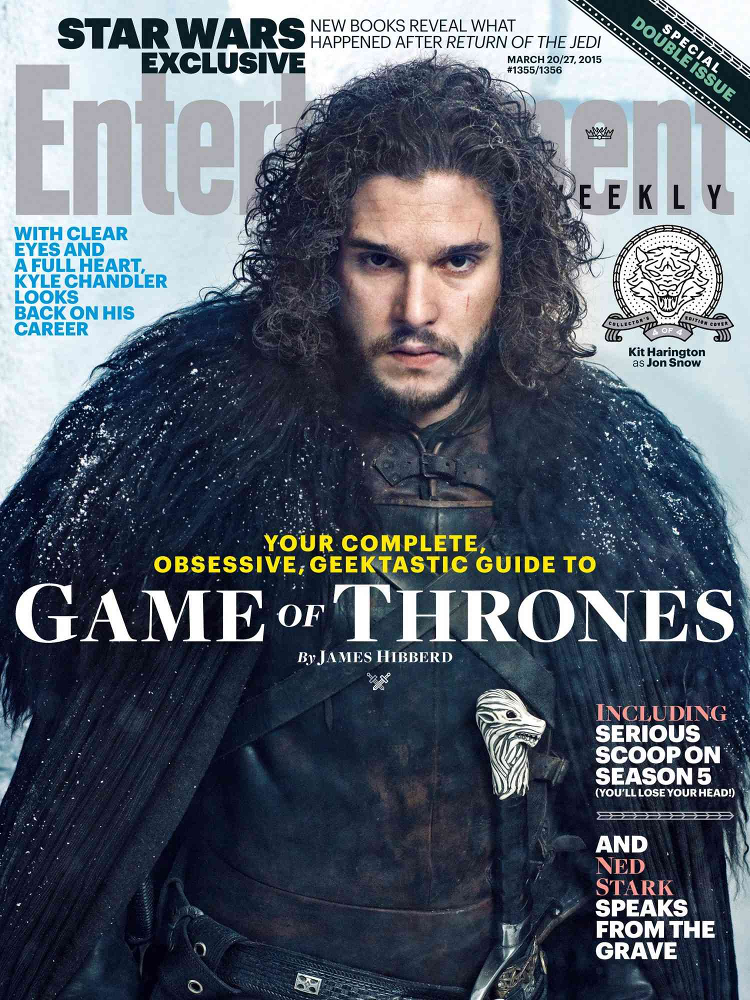


Before vs After Comparison


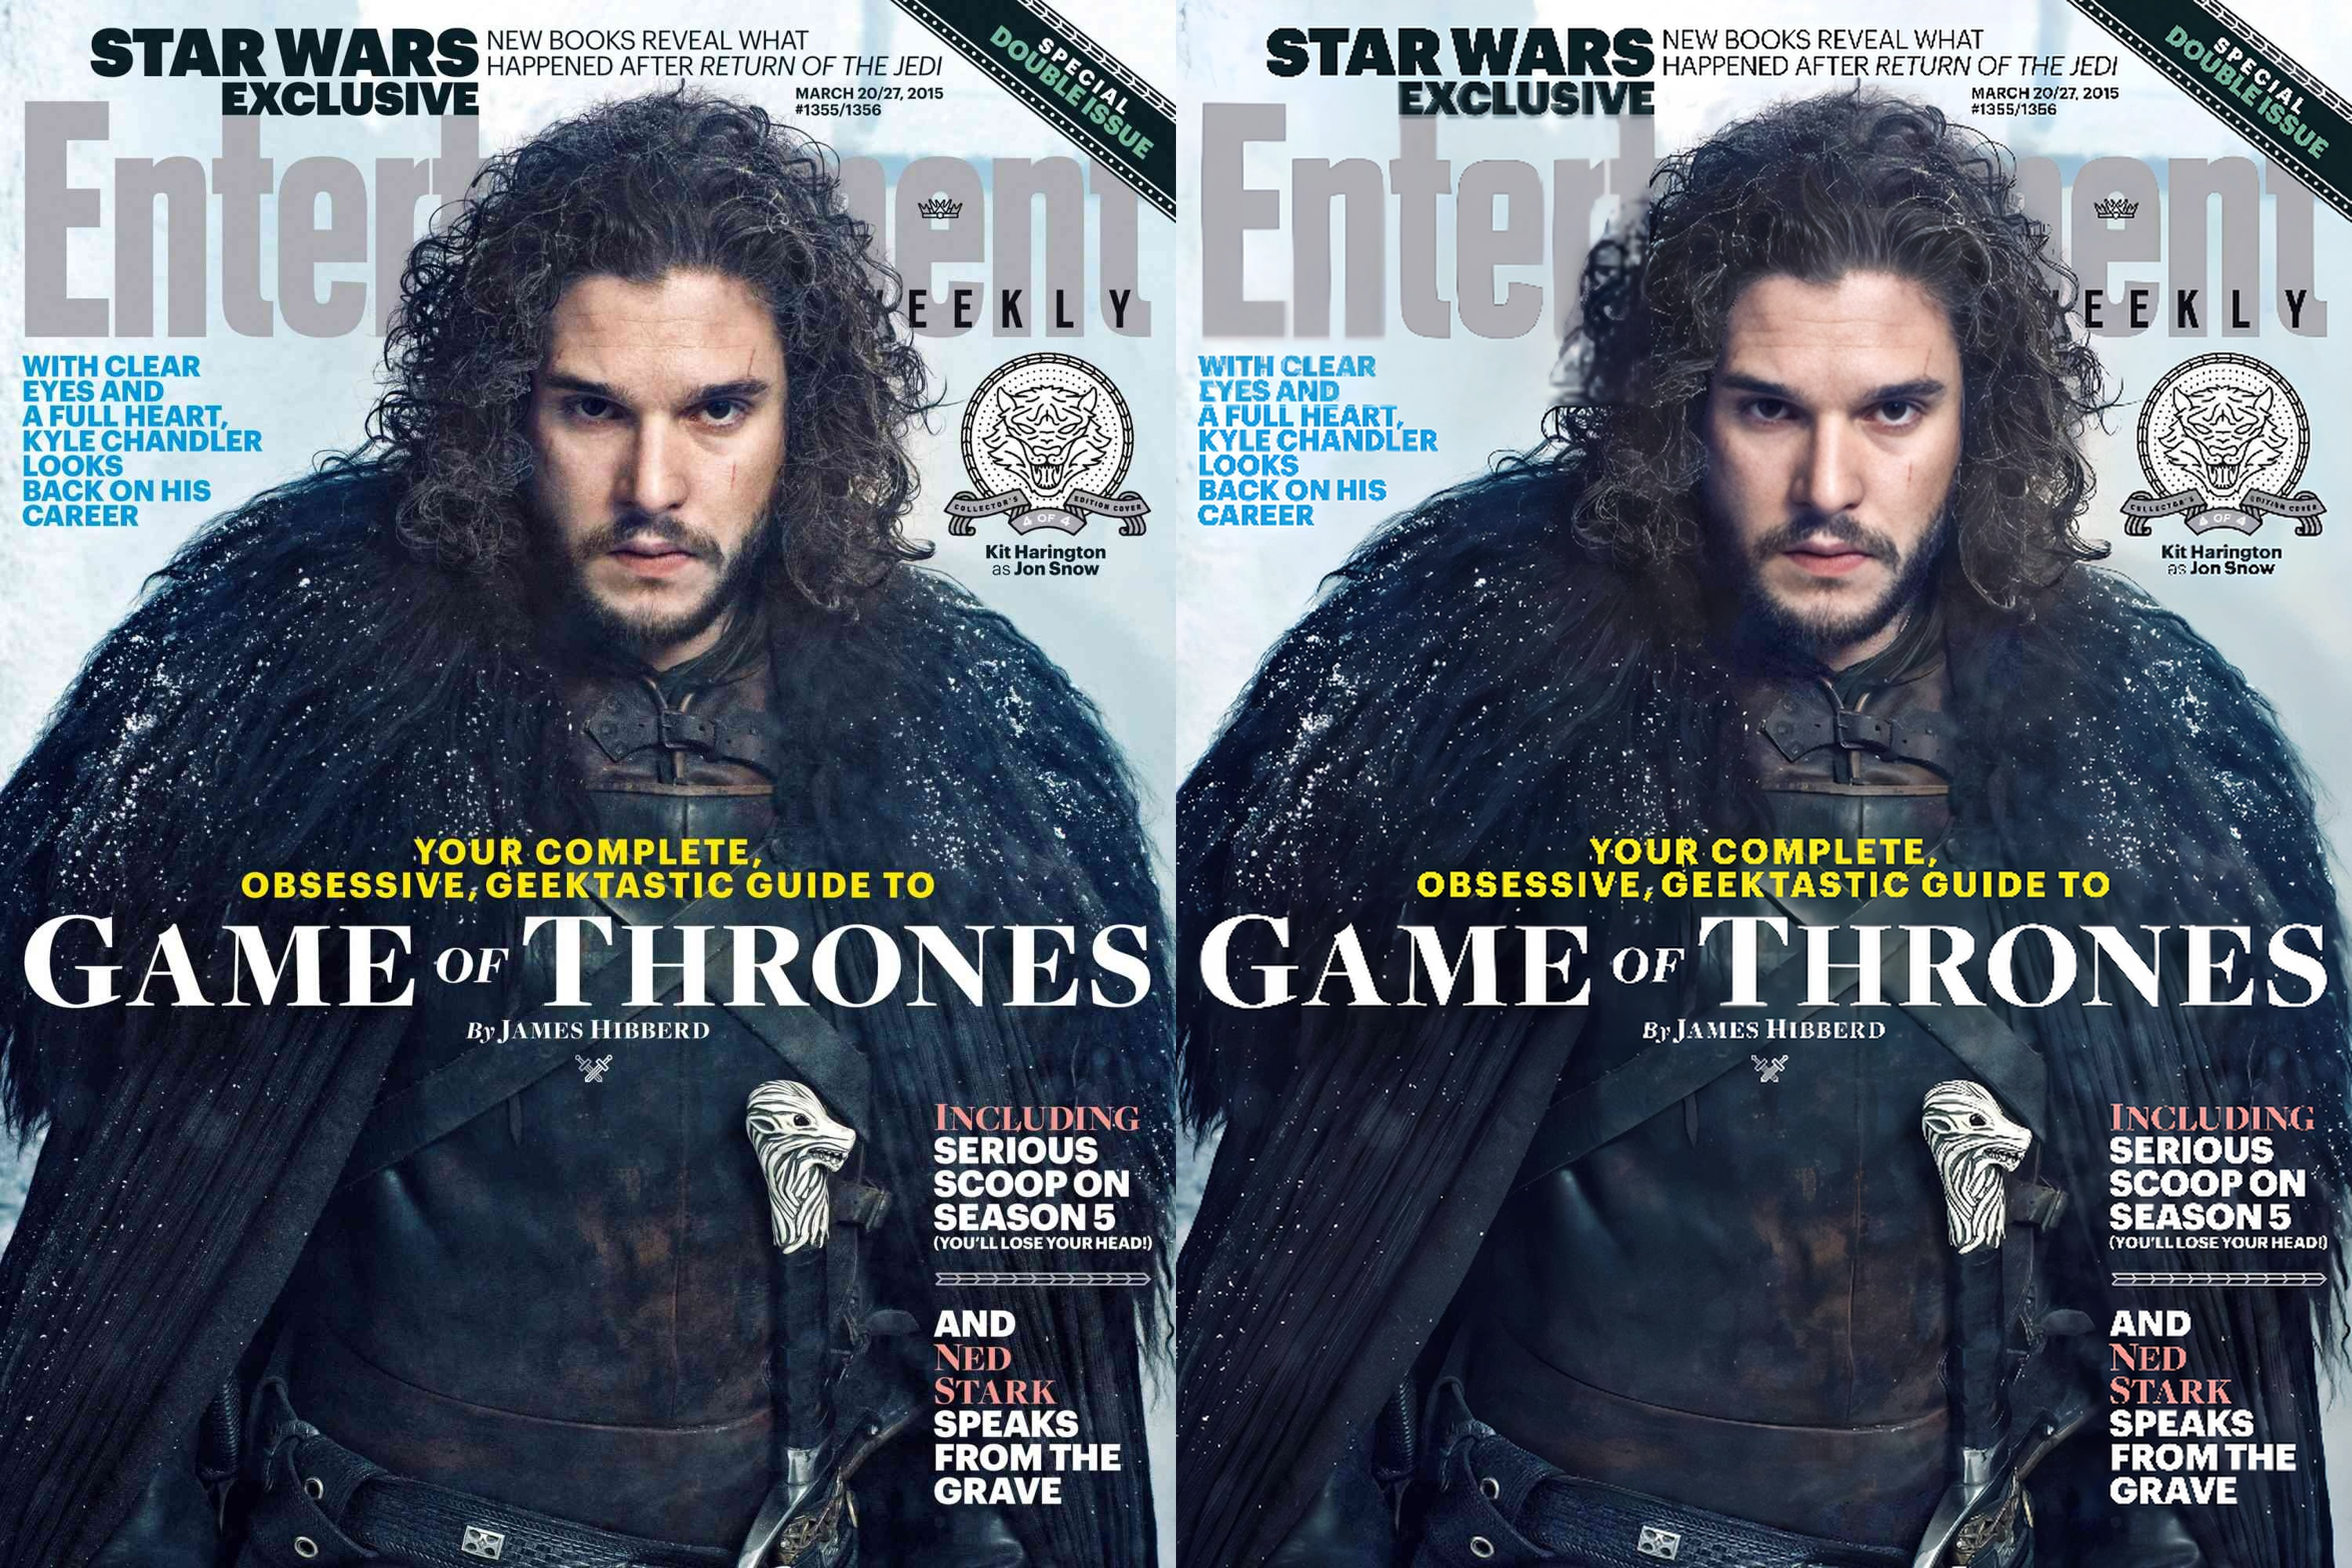


Histogram Comparison


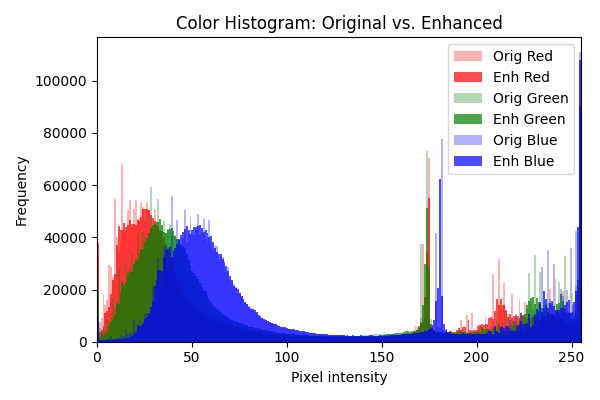


Segmentation Heatmap


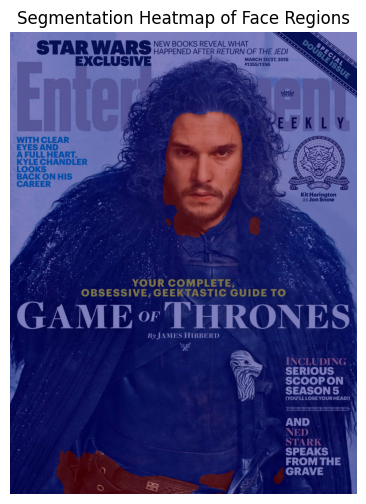


Combined Metrics Overview


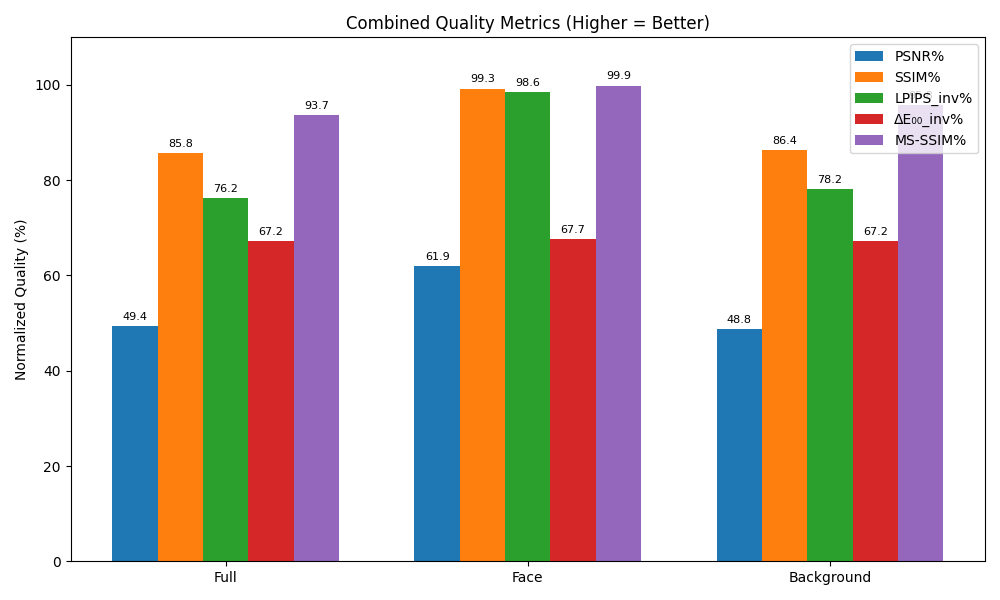


OCR Confidence Comparison


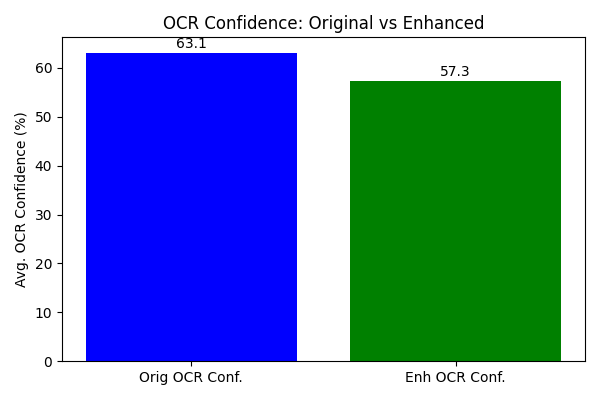


Multi-Scale SSIM by Region


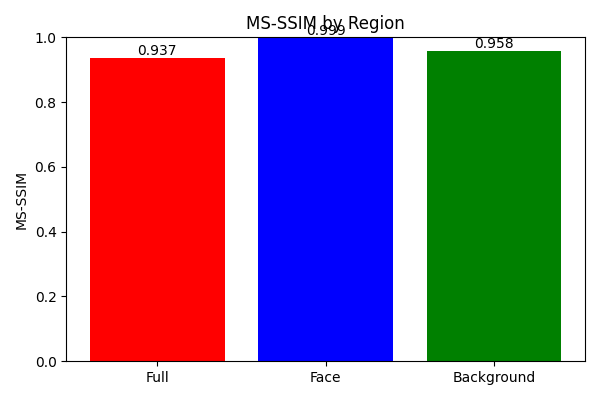


Comparing downsampled LR (upsampled) vs Enhanced output.


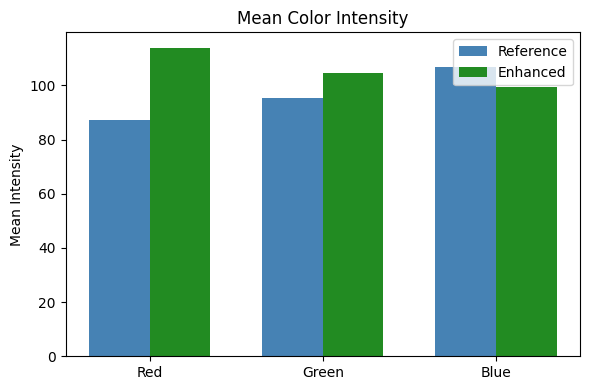

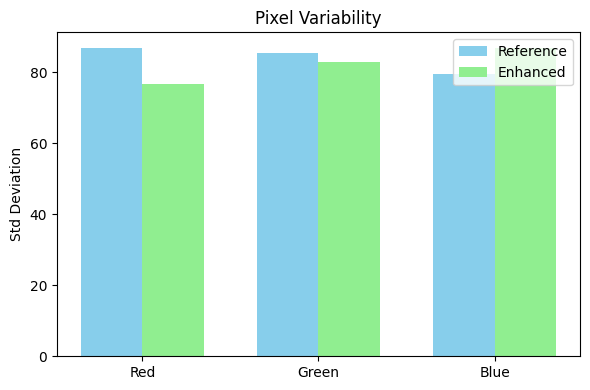


Detailed Metrics Interpretation

FULL IMAGE ANALYSIS
• PSNR   : 24.6765 → Moderate quality (Visible artifacts)
• SSIM   : 0.8575 → High similarity (Noticeable but acceptable)
• LPIPS  : 0.2375 → Different (Clear perceptual changes)
• MSSSIM : 0.9365 → Good structural similarity


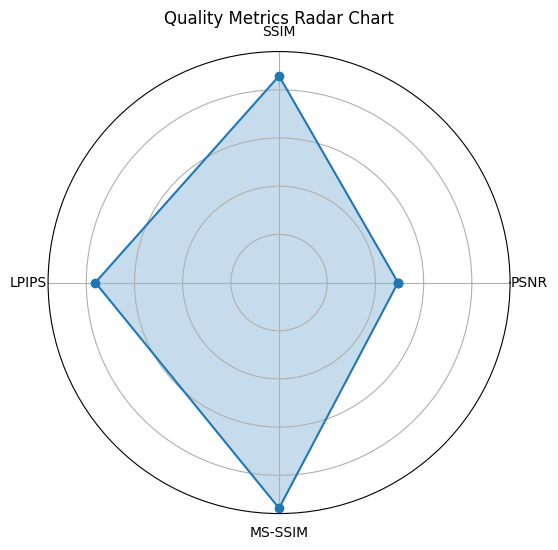


FACE REGION ANALYSIS
• PSNR   : 30.9577 → Good quality (Noticeable but fine)
• SSIM   : 0.9925 → Nearly identical (Imperceptible differences)
• LPIPS  : 0.0142 → Virtually identical (Perceptually indistinguishable)
• MSSSIM : 0.9986 → Nearly perfect structural similarity

BACKGROUND REGION ANALYSIS
• PSNR   : 24.4087 → Moderate quality (Visible artifacts)
• SSIM   : 0.8639 → High similarity (Noticeable but acceptable)
• LPIPS  : 0.2182 → Different (Clear perceptual changes)
• MSSSIM : 0.9577 → Excellent structural preservation

TEXT ANALYSIS
• OCR Confidence Original: 63.1%
• OCR Confidence Enhanced: 57.3%
→ Noticeable reduction in text legibility


In [40]:
from IPython.display import display, Image as IPyImage
import matplotlib.pyplot as plt
import json
import os
import cv2
import numpy as np
from skimage.color import rgb2gray
from skimage.filters import laplace


def visualize_all_outputs():
    def show_saved_image(path: str, title: str):
        print(f"\n{title}")
        if os.path.exists(path):
            display(IPyImage(filename=path))
        else:
            print(f"[Warning] File not found: {path}")

    def interpret_score(name, value):
        if name == "psnr":
            if value >= 40: return "Excellent quality (Professional grade)"
            elif value >= 30: return "Good quality (Noticeable but fine)"
            elif value >= 20: return "Moderate quality (Visible artifacts)"
            else: return "Low quality (Severe degradation)"
        elif name == "ssim":
            if value >= 0.95: return "Nearly identical (Imperceptible differences)"
            elif value >= 0.90: return "Very high similarity (Minor changes)"
            elif value >= 0.80: return "High similarity (Noticeable but acceptable)"
            elif value >= 0.70: return "Moderate similarity (Visible differences)"
            else: return "Low similarity (Significant changes)"
        elif name == "lpips":
            if value <= 0.05: return "Virtually identical (Perceptually indistinguishable)"
            elif value <= 0.10: return "Very similar (Minor perceptual differences)"
            elif value <= 0.20: return "Similar (Noticeable but acceptable)"
            elif value <= 0.30: return "Different (Clear perceptual changes)"
            else: return "Very different (Strong perceptual differences)"
        elif name == "msssim":
            if value >= 0.98: return "Nearly perfect structural similarity"
            elif value >= 0.95: return "Excellent structural preservation"
            elif value >= 0.90: return "Good structural similarity"
            elif value >= 0.85: return "Moderate structural changes"
            else: return "Significant structural differences"
        return "Unknown metric"

    def plot_radar_chart(metrics):
        labels = ['PSNR', 'SSIM', 'LPIPS', 'MS-SSIM']
        psnr_norm   = min(metrics.get("psnr", 0) / 50.0, 1.0)
        ssim_norm   = metrics.get("ssim", 0)
        lpips_norm  = 1 - metrics.get("lpips", 0)
        msssim_norm = metrics.get("msssim", 0)
        values = [psnr_norm, ssim_norm, lpips_norm, msssim_norm]
        angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
        values += values[:1]
        angles += angles[:1]
        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
        ax.fill(angles, values, alpha=0.25)
        ax.plot(angles, values, marker='o')
        ax.set_yticklabels([])
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(labels)
        ax.set_title('Quality Metrics Radar Chart', pad=20)
        plt.show()

    print("=== Visual Analysis of Saved Outputs ===")
    image_paths = {
        "Downsampled Image":          "outputs/downsampled_lr.png",
        "Before vs After Comparison": "outputs/compare.jpg",
        "Histogram Comparison":       "outputs/histogram.png",
        "Segmentation Heatmap":       "outputs/segmentation_heatmap.png",
        "Combined Metrics Overview":  "outputs/combined_metrics.png",
        "OCR Confidence Comparison":  "outputs/ocr_confidence.png",
        "Multi-Scale SSIM by Region": "outputs/msssim_by_region.png",
    }
    for title, path in image_paths.items():
        show_saved_image(path, title)

    # --- New block: compare downsampled LR vs enhanced ---
    cmp_path = "outputs/compare.jpg"
    lr_path = "outputs/downsampled_lr.png"
    enhanced_full = cv2.imread("outputs/debug_final_result.png")
    if enhanced_full is not None:
        enhanced_rgb = cv2.cvtColor(enhanced_full, cv2.COLOR_BGR2RGB)
        eh_h, eh_w = enhanced_rgb.shape[:2]
        half_w = eh_w // 2
        enhanced_half = enhanced_rgb[:, half_w:]
    else:
        enhanced_half = None

    if os.path.exists(lr_path) and enhanced_half is not None:
        lr = cv2.imread(lr_path)
        lr_rgb = cv2.cvtColor(lr, cv2.COLOR_BGR2RGB)
        ref_img = cv2.resize(lr_rgb, (eh_w, eh_h), interpolation=cv2.INTER_LANCZOS4)
        enh_img = enhanced_half.copy()
        print("\nComparing downsampled LR (upsampled) vs Enhanced output.")
    elif os.path.exists(cmp_path) and enhanced_half is not None:
        cmp_full = cv2.imread(cmp_path)
        cmp_rgb  = cv2.cvtColor(cmp_full, cv2.COLOR_BGR2RGB)
        ref_img  = cmp_rgb[:, :half_w]
        enh_img  = enhanced_half.copy()
        print("\nComparing original (left half) vs Enhanced (right half).")
    else:
        ref_img = enh_img = None

    if ref_img is not None and enh_img is not None:
        # Mean color intensity comparison
        orig_mean = np.mean(ref_img, axis=(0, 1))
        enh_mean  = np.mean(enh_img, axis=(0, 1))
        channels = ["Red", "Green", "Blue"]
        x = np.arange(len(channels))
        width = 0.35

        fig, ax = plt.subplots(figsize=(6, 4))
        ax.bar(x - width/2, orig_mean, width, label="Reference", color="steelblue")
        ax.bar(x + width/2, enh_mean,  width, label="Enhanced",  color="forestgreen")
        ax.set_xticks(x)
        ax.set_xticklabels(channels)
        ax.set_ylabel("Mean Intensity")
        ax.set_title("Mean Color Intensity")
        ax.legend()
        plt.tight_layout()
        plt.show()

        # Pixel variability (standard deviation) comparison
        orig_std = np.std(ref_img, axis=(0, 1))
        enh_std  = np.std(enh_img, axis=(0, 1))

        fig, ax = plt.subplots(figsize=(6, 4))
        ax.bar(x - width/2, orig_std, width, label="Reference", color="skyblue")
        ax.bar(x + width/2, enh_std,  width, label="Enhanced",  color="lightgreen")
        ax.set_xticks(x)
        ax.set_xticklabels(channels)
        ax.set_ylabel("Std Deviation")
        ax.set_title("Pixel Variability")
        ax.legend()
        plt.tight_layout()
        plt.show()

    # Load and interpret metrics
    metrics_path = "outputs/metrics_extended.json"
    if not os.path.exists(metrics_path):
        print("\nExtended metrics not found.")
        return

    print("\nDetailed Metrics Interpretation")
    with open(metrics_path, "r") as f:
        metrics = json.load(f)

    # Full image metrics
    print("\nFULL IMAGE ANALYSIS")
    full_metrics = metrics.get("full", {})
    for key in ["psnr", "ssim", "lpips", "msssim"]:
        val = full_metrics.get(key)
        if val is not None:
            print(f"• {key.upper():<7}: {val:.4f} → {interpret_score(key, val)}")
    plot_radar_chart(full_metrics)

    # Face region metrics
    print("\nFACE REGION ANALYSIS")
    face_metrics = metrics.get("face", {})
    for key in ["psnr", "ssim", "lpips", "msssim"]:
        val = face_metrics.get(key)
        if val is not None:
            print(f"• {key.upper():<7}: {val:.4f} → {interpret_score(key, val)}")

    # Background region metrics
    print("\nBACKGROUND REGION ANALYSIS")
    bg_metrics = metrics.get("background", {})
    for key in ["psnr", "ssim", "lpips", "msssim"]:
        val = bg_metrics.get(key)
        if val is not None:
            print(f"• {key.upper():<7}: {val:.4f} → {interpret_score(key, val)}")

    # Text metrics
    if "text" in metrics:
        print("\nTEXT ANALYSIS")
        text_metrics = metrics["text"]
        orig_conf = text_metrics.get("ocr_confidence_orig", 0)
        enh_conf  = text_metrics.get("ocr_confidence_enh", 0)
        conf_diff = enh_conf - orig_conf

        print(f"• OCR Confidence Original: {orig_conf:.1f}%")
        print(f"• OCR Confidence Enhanced: {enh_conf:.1f}%")
        if   conf_diff > 5:  print("→ Significant improvement in text legibility")
        elif conf_diff > 0:  print("→ Slight improvement in text legibility")
        elif conf_diff > -5: print("→ Minor reduction in text legibility")
        else:                print("→ Noticeable reduction in text legibility")

# Run the visualization
visualize_all_outputs()

# 5. Gradio Integration

This cell ensures an `outputs/` directory, imports `tempfile`, `subprocess`, `requests`, `PIL.Image`, and `gradio`, then defines `gradio_enhance_from_url()` to download an image from a URL, invoke `enhance_pipeline.py` with the chosen `--face/--background/--text` flags via `subprocess.run()`, and return the enhanced PIL image. Finally, `gr.Interface` exposes this function as a public HTTP endpoint—which the Flask backend calls (via POST) to kick off processing, retrieve the enhanced image, and relay it back for storage and display.  

In [41]:
# Ensure a persistent outputs directory under /content
%cd /content
!mkdir -p outputs

# Import necessary libraries
import os, tempfile, subprocess, requests
from PIL import Image
import gradio as gr

# Define the core Gradio function that wraps the enhancement pipeline
def gradio_enhance_from_url(
    file_url: str,
    face: bool,
    background: bool,
    text: bool,
):
    # Download the input image from the S3 URL
    resp = requests.get(file_url)
    resp.raise_for_status()  # Ensure the URL is valid and accessible
    in_file = tempfile.NamedTemporaryFile(suffix=".jpg", delete=False).name
    with open(in_file, "wb") as f:
        f.write(resp.content)

    # Construct the enhancement command using selected options
    cwd = "/content"
    out_file = tempfile.NamedTemporaryFile(suffix=".jpg", delete=False).name
    cmd = [
        "python", "enhance_pipeline.py",  # Run the core enhancement script
        "--input", in_file,               # Path to the input image
        "--output", out_file              # Path where the enhanced image will be saved
    ]
    if face:
        cmd.append("--face")
    if background:
        cmd.append("--background")
    if text:
        cmd.append("--text")

    # Run the command inside the Colab working directory
    subprocess.run(cmd, cwd=cwd, check=True)

    # Load the final enhanced image from the output path
    return Image.open(out_file).convert("RGB")

# Define the Gradio interface (inputs and outputs)
iface = gr.Interface(
    fn=gradio_enhance_from_url,
    inputs=[
        gr.Textbox(label="S3 File URL", placeholder="https://..."),
        gr.Checkbox(label="Enhance Faces"),
        gr.Checkbox(label="Enhance Background"),
        gr.Checkbox(label="Enhance Text"),
    ],
    outputs=gr.Image(type="pil", label="Enhanced Image"),
    title="SharpifyAI Demo (URL → Enhanced)"
)

# Launch the interface in queue mode to allow async execution
iface.queue().launch(share=True, debug=True, show_error=True)

/content
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://acb61bb790159c3141.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://acb61bb790159c3141.gradio.live
